## **World Population Analysis Using Python**

I imported the necessary libraries and dataset I will be using.

In [86]:
import pandas as pd
import numpy as np
import plotly.express as pe
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as pg

data = pd.read_csv('/content/World Population Live Dataset.csv')
df = data.copy()
df.head()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5


I checked the information about the dataset

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CCA3                         233 non-null    object 
 1   Name                         234 non-null    object 
 2   2022                         234 non-null    int64  
 3   2020                         234 non-null    int64  
 4   2015                         234 non-null    int64  
 5   2010                         234 non-null    int64  
 6   2000                         234 non-null    int64  
 7   1990                         234 non-null    int64  
 8   1980                         234 non-null    int64  
 9   1970                         234 non-null    int64  
 10  Area (km²)                   234 non-null    int64  
 11  Density (per km²)            234 non-null    float64
 12  GrowthRate                   234 non-null    float64
 13  World Population Per

I checked for the statistical summary of the dataframe

In [87]:
df.describe()

,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,Rank
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,2.340000e+02,234.000000,234.000000,234.000000
mean,3.407441e+04,3.350109e+04,3.172995e+04,2.984523e+04,2.626947e+04,2.271024e+04,18984.645299,15786.876068,5.814494e+05,452.127044,1.009829,117.500000
std,1.367664e+05,1.355899e+05,1.304050e+05,1.242185e+05,1.116982e+05,9.783216e+04,81785.136077,67795.064322,1.761841e+06,2066.121904,0.013772,67.694165
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,0.026100,0.910000,1.000000
25%,4.197500e+02,4.150000e+02,4.045000e+02,3.930000e+02,3.272500e+02,2.642500e+02,229.500000,155.750000,2.650000e+03,38.417875,1.000000,59.250000
50%,5.560000e+03,5.493000e+03,5.307000e+03,4.943000e+03,4.293000e+03,3.825500e+03,3141.000000,2604.500000,8.119950e+04,95.346750,1.010000,117.500000
75%,2.247675e+04,2.144825e+04,1.973075e+04,1.915950e+04,1.576225e+04,1.186950e+04,9826.000000,8817.500000,4.304258e+05,238.933250,1.020000,175.750000
max,1.425887e+06,1.424930e+06,1.393715e+06,1.348191e+06,1.264099e+06,1.153704e+06,982372.000000,822534.000000,1.709824e+07,23172.266700,1.070000,234.000000


I returned all null values

In [88]:
df.isnull().sum()

,0
CCA3,1
Name,0
2022,0
2020,0
2015,0
2010,0
2000,0
1990,0
1980,0
1970,0


I splited the dataset into categorical and numerical columns, I found out that the 'World Population Percentage' columns falls under the categorical columnn which is meant to be at the numerical column

In [89]:
categoricals = df.select_dtypes(include = ['object', 'category'])
numericals = df.select_dtypes(include = 'number')

print(f"\t\tCategorical Columns")
display(categoricals.head())
print(f"\n\t\tNumerical Columns")
display(numericals.head())

		Categorical Columns


,CCA3,Name,World Population Percentage
0,CN,China,17.88%
1,IN,India,17.77%
2,US,United States,4.24%
3,ID,Indonesia,3.45%
4,PK,Pakistan,2.96%



		Numerical Columns


,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,Rank
0,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,1
1,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,2
2,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,3
3,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,4
4,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,5


I listed out the columns available in the dataset

In [91]:
print(df.columns)


Index(['CCA3', 'Name', '2022', '2020', '2015', '2010', '2000', '1990', '1980',
       '1970', 'Area (km²)', 'Density (per km²)', 'GrowthRate',
       'World Population Percentage', 'Rank'],
      dtype='object')


I check for the values of 'World Population Percentage' to know where the issue is and I realized it was the percentage symbol% that was the hindrance

In [92]:
df['World Population Percentage'].sample(20).values

array(['1.11%', '0.00%', '0.00%', '0.03%', '0.00%', '0.00%', '0.52%',
       '0.08%', '0.07%', '0.00%', '4.24%', '0.20%', '0.27%', '0.01%',
       '0.33%', '0.17%', '1.60%', '3.45%', '0.15%', '1.23%'], dtype=object)

I changed the "World Population Percentage" to numerical column by dividing the data set by 100 and converting the percentage to fractions

In [93]:
df['World Population Percentage'] = df['World Population Percentage'].astype(str).str.rstrip('%')
df['World Population Percentage'] = pd.to_numeric(df['World Population Percentage'], errors='coerce') / 100


I splitted the dataset again to check if the 'World Population Percentage' column has been transferred to the numerical columns

In [94]:
categoricals = df.select_dtypes(include = ['object', 'category'])
numericals = df.select_dtypes(include = 'number')

print(f"\t\tCategorical Columns")
display(categoricals.head())
print(f"\n\t\tNumerical Columns")
display(numericals.head())

		Categorical Columns


,CCA3,Name
0,CN,China
1,IN,India
2,US,United States
3,ID,Indonesia
4,PK,Pakistan



		Numerical Columns


,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,0.1788,1
1,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,0.1777,2
2,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,0.0424,3
3,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,0.0345,4
4,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,0.0296,5


I noticed the names of the country were a lot, I took a list of all the possible countries available

In [68]:
df['Name'].sample(50).values

array(['Hong Kong', 'Spain', 'Romania', 'Uruguay', 'Morocco',
       'Antigua and Barbuda', 'Qatar', 'Guernsey', 'Belarus', 'Austria',
       'Niger', 'Costa Rica', 'San Marino', 'Iraq',
       'Republic of the Congo', 'Benin', 'Burundi', 'Eswatini',
       'Turks and Caicos Islands', 'Aruba', 'El Salvador', 'Lebanon',
       'Malta', 'Bahamas', 'Ghana', 'Estonia', 'Guinea-Bissau',
       'Barbados', 'Papua New Guinea', 'Macau', 'Syria', 'United States',
       'Turkmenistan', 'Tokelau', 'Tanzania', 'Ivory Coast', 'Sudan',
       'Comoros', 'Tunisia', 'Anguilla', 'Kazakhstan', 'Gibraltar',
       'Dominican Republic', 'Timor-Leste', 'Liechtenstein',
       'Saint Lucia', 'Reunion', 'Sri Lanka', 'Isle of Man', 'Slovenia'],
      dtype=object)

I created a bar plot but I only included a few selected countries

<ipython-input-77-f3ac68e0928f>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


<ipython-input-77-f3ac68e0928f>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




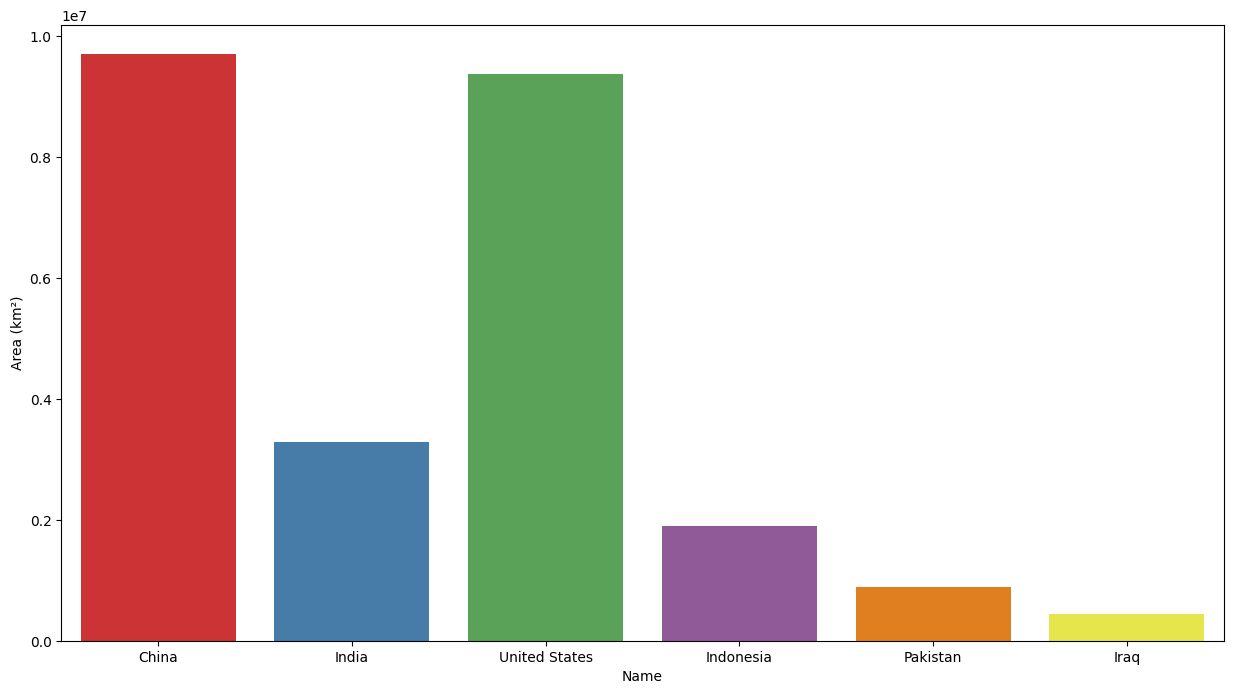

In [77]:
selected_countries = ["China", "India", "United States", "Indonesia", "Pakistan", "Iraq"]

dx = df[df["Name"].isin(selected_countries)]

plt.figure(figsize=(15, 8))
sns.barplot(x=dx["Name"], y=dx["Area (km²)"], ci=0, palette="Set1", estimator="mean")

plt.show()

I created a barplot of all the countries in relation to their world rank

In [96]:
select = data[['Name', 'Rank']]
select = select.groupby('Name')[['Rank']].mean().sort_values(by = 'Rank', ascending = False)
select

fig = pe.bar(data_frame= select, x = select.index, y= 'Rank', color = 'Rank', width = 800, height=00, title='Distrbution of Countries Name with respect to their world rank')
fig.show()

I made a bar plot also with some selected countries

In [107]:
selected_countries = ["China", 'Turkey', 'Nigeria', 'Spain', "India", "Indonesia", "South Africa"]

select = data[data["Name"].isin(selected_countries)][["Name", "Area (km²)"]]
select = select.groupby('Name')[['Area (km²)']].mean().sort_values(by = 'Area (km²)', ascending = False)
select

fig = pe.bar(data_frame= select, x = select.index, y= 'Area (km²)', color = 'Area (km²)', width = 800, height=700, title='Distrbution of Countries Name with respect to their world Area (km²)')
fig.show()

I made a pie chart with some certain years to get the propotion of the population over those years

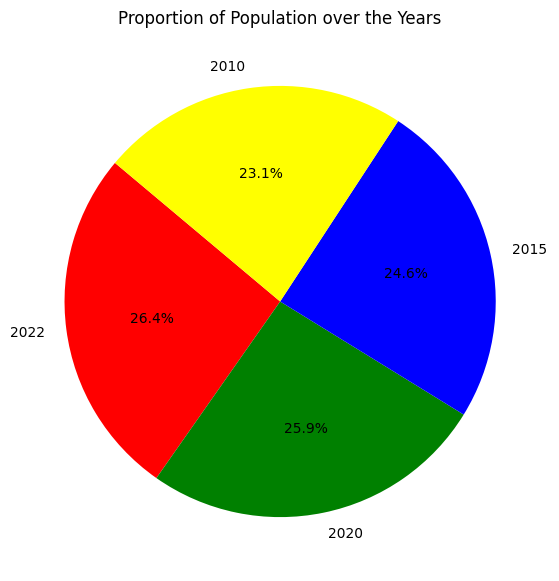

In [108]:
select = df[['2022', '2020', '2015', '2010']].sum()
plt.figure(figsize=(7, 7))
plt.pie(select, labels=select.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'blue', 'yellow'])
plt.title('Proportion of Population over the Years')
plt.show()